# CVE

**Common Vulnerabilities and Exposures Identifier (CVE ID)** is a unique, alphanumeric identifier assigned by the CVE Program. Each identifier references a specific vulnerability. A CVE ID enables automation and multiple parties to discuss, share, and correlate information about a specific vulnerability, knowing they are referring to the same thing

> source: [www.cve.org](https://www.cve.org/ResourcesSupport/Glossary?activeTerm=glossaryCVEID)

You can see this notebook directly via:
- [GitHub](https://github.com/LimberDuck/limberduck.org/blob/master/docs/notebooks/cve/cve.ipynb)
- [Jupter nbviewer](https://nbviewer.org/github/LimberDuck/limberduck.org/blob/master/docs/notebooks/cve/cve.ipynb)

## Generation time

In [1]:
from datetime import datetime, timezone, timedelta

timezone_offset = 0.0
tzinfo = timezone(timedelta(hours=timezone_offset))
generation_time = datetime.now(tzinfo).strftime('%Y-%m-%d %H:%M:%S %z')
print(generation_time)

2022-03-20 21:53:45 +0000


## Creative Commons

This notebook and generated diagrams are released with [Creative Commons liecense (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/deed.en).

<a href="https://creativecommons.org/licenses/by/4.0/deed.en"><img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by.png" alt="CC BY 4.0" width="100px"/></a>

In [2]:
import requests
import urllib3

urllib3.disable_warnings()

urls = ['https://mirrors.creativecommons.org/presskit/icons/cc.xlarge.png',
       'https://mirrors.creativecommons.org/presskit/icons/by.xlarge.png']
for url in urls:
    file_name = url.split("/")[-1:][0]
    print(file_name)

    file = requests.get(url, verify=False)
    open(file_name, 'wb').write(file.content)

cc.xlarge.png
by.xlarge.png


## CVE data downloading

All CVE IDs are taken from [cve.mitre.org/data/downloads/index.html](https://cve.mitre.org/data/downloads/index.html)

In [3]:
url = 'https://cve.mitre.org/data/downloads/allitems.xml'
file_name = url.split("/")[-1:][0]
print(file_name)

allitems.xml


In [4]:
import requests
import urllib3

urllib3.disable_warnings()

file = requests.get(url, verify=False)
open(file_name, 'wb').write(file.content)

221455503

## CVE data parsing

In [5]:
import pandas as pd 
import xml.etree.ElementTree as et 

tree = et.parse(file_name)
root = tree.getroot()
df_cols = ["number", "year"]
rows = []

for item in root:
    item_name = item.attrib.get("name")
    item_year = item_name[4:8]
    rows.append({"number": item_name, "year": item_year})

df = pd.DataFrame(rows, columns = df_cols)

print(df)

                number  year
0        CVE-1999-0001  1999
1        CVE-1999-0002  1999
2        CVE-1999-0003  1999
3        CVE-1999-0004  1999
4        CVE-1999-0005  1999
...                ...   ...
231203  CVE-2022-27254  2022
231204  CVE-2022-27255  2022
231205  CVE-2022-27256  2022
231206  CVE-2022-27257  2022
231207  CVE-2022-27258  2022

[231208 rows x 2 columns]


In [6]:
df = df.groupby(['year'], as_index=False)[['number']].count()
df.reset_index(drop=True, inplace=True)
df.index += 1

df.style.bar(subset=['number'], color='#FF6200')

,year,number
1,1999,1579
2,2000,1243
3,2001,1573
4,2002,2436
5,2003,1603
6,2004,2779
7,2005,4900
8,2006,7254
9,2007,6764
10,2008,7322


## CVE data saving

CSV file is available in GitHub repository, see:

- [file via GitHub](https://github.com/LimberDuck/limberduck.org/blob/master/docs/notebooks/cve/cve-number-of-entries.csv)
- [file directly](https://raw.githubusercontent.com/LimberDuck/limberduck.org/master/docs/notebooks/cve/cve-number-of-entries.csv)

In [7]:
csv_filename = 'cve-number-of-entries.csv'

df.to_csv(csv_filename, index=False)

## CVE data ploting

PNG files are available in GitHub repository with two background versions, see: 

- [file via GitHub (white background)](https://github.com/LimberDuck/limberduck.org/blob/master/docs/notebooks/cve/cve-number-of-entries-bg-white.png)
- [file via GitHub (transparent background)](https://github.com/LimberDuck/limberduck.org/blob/master/docs/notebooks/cve/cve-number-of-entries-bg-transparent.png)
- [file directly (white background)](https://raw.githubusercontent.com/LimberDuck/limberduck.org/master/docs/notebooks/cve/cve-number-of-entries-bg-white.png)
- [file directly (transparent background)](https://raw.githubusercontent.com/LimberDuck/limberduck.org/master/docs/notebooks/cve/cve-number-of-entries-bg-transparent.png)

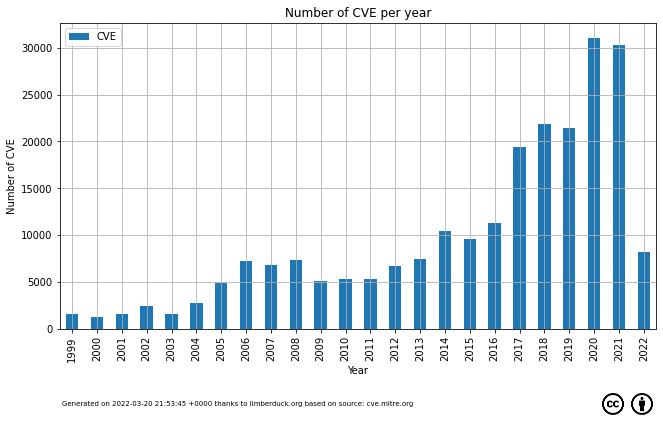

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv(csv_filename)

df.plot(x='year', 
        xlabel='Year',
        y='number', 
        ylabel='Number of CVE',
        kind='bar', 
        title='Number of CVE per year')
plt.tight_layout()
plt.legend(['CVE'])
plt.figtext(0.15, 0.02, f"Generated on {generation_time} thanks to limberduck.org based on source: cve.mitre.org", ha="left", fontsize=7)
fig = plt.gcf()
fig.set_size_inches(10,6)
fig.patch.set_facecolor('white')
plt.grid(True)

img_cc = plt.imread('cc.xlarge.png')
newax_cc = fig.add_axes([0.88, 0.0, 0.05, 0.05], anchor='NE', zorder=-1)
newax_cc.imshow(img_cc)
newax_cc.axis('off')
img_by = plt.imread('by.xlarge.png')
newax_by = fig.add_axes([0.92, 0.0, 0.05, 0.05], anchor='NE', zorder=-1)
newax_by.imshow(img_by)
newax_by.axis('off')

plt.savefig('cve-number-of-entries-bg-white.png', dpi = 300, facecolor = 'white')
plt.savefig('cve-number-of-entries-bg-transparent.png', dpi = 300, transparent = True)